In [ ]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.stem import WordNetLemmatizer

import re, string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import NMF

import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

nltk.download('stopwords')
sns.set_style("whitegrid")
sns.set_context("poster")

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_fondos = pd.read_csv('/content/drive/MyDrive/Datasets/funding.csv')

In [ ]:
data_fondos.head()

,Description,Market,Names,No_Stage_Amount,No_Stage_Date,Pitch,Seed_Amount,Seed_Date,Series_A_Amount,Series_A_Date,Series_B_Amount,Series_B_Date,Series_C_Amount,Series_C_Date,Series_D_Amount,Series_D_Date,Stage
0,NaN,Cable,Epic-Sciences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$13,000,000","Nov 13, 2012","$30,000,000","Jul 30, 2014",NaN,NaN,Series C
1,NaN,All Students,Apreso-Classroom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$15,000,000","Oct 14, 2008",NaN,NaN,NaN,NaN,Series B
2,Visualead (视觉码) creates better interactions be...,Bridging Online and Offline,Visualead,NaN,NaN,Effective and Secure Offline to Mobile experie...,"$750,000","Mar 25, 2012","$1,600,000","Aug 15, 2013",Unknown,"Jan 20, 2015",NaN,NaN,NaN,NaN,Series B
3,NaN,Food Processing,Onshift,"$7,000,000","Feb 3, 2014",NaN,NaN,NaN,NaN,NaN,"$3,000,000","Feb 2, 2012",NaN,NaN,NaN,NaN,Series C
4,NaN,-,Xendex-Holding,NaN,NaN,NaN,NaN,NaN,Unknown,"Jun 25, 2008","$3,500,000","Nov 30, 2009",NaN,NaN,NaN,NaN,Series A


In [ ]:
data_fondos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Description      1043 non-null   object
 1   Market           2901 non-null   object
 2   Names            3203 non-null   object
 3   No_Stage_Amount  1436 non-null   object
 4   No_Stage_Date    1436 non-null   object
 5   Pitch            636 non-null    object
 6   Seed_Amount      471 non-null    object
 7   Seed_Date        471 non-null    object
 8   Series_A_Amount  1689 non-null   object
 9   Series_A_Date    1689 non-null   object
 10  Series_B_Amount  2664 non-null   object
 11  Series_B_Date    2664 non-null   object
 12  Series_C_Amount  1368 non-null   object
 13  Series_C_Date    1368 non-null   object
 14  Series_D_Amount  399 non-null    object
 15  Series_D_Date    399 non-null    object
 16  Stage            2685 non-null   object
dtypes: object(17)
memory usage: 426.1

Transformamos los Montos de las rondas de financiemiento a Int

In [ ]:
data_fondos['Seed_Amount'] = data_fondos['Seed_Amount'].str.replace(',','')
data_fondos['Seed_Amount'] = data_fondos['Seed_Amount'].str.replace('$','', regex=True)
data_fondos['Seed_Amount'] = data_fondos['Seed_Amount'].replace(np.nan, 0)
data_fondos['Seed_Amount'] = data_fondos['Seed_Amount'].replace('Unknown', 0)
data_fondos['Seed_Amount'] = data_fondos['Seed_Amount'].astype(int)

In [ ]:
data_fondos['Series_A_Amount']=data_fondos['Series_A_Amount'].str.replace('[\$\,]','',regex=True)
data_fondos['Series_A_Amount'] =data_fondos['Series_A_Amount'].replace(np.nan, 0)
data_fondos['Series_A_Amount'] = data_fondos['Series_A_Amount'].replace('Unknown', 0)
data_fondos['Series_A_Amount'] = data_fondos['Series_A_Amount'].astype(int)

In [ ]:
data_fondos['Series_B_Amount']=data_fondos['Series_B_Amount'].str.replace('[\$\,]','',regex=True)
data_fondos['Series_B_Amount'] = data_fondos['Series_B_Amount'].replace(np.nan, 0)
data_fondos['Series_B_Amount'] = data_fondos['Series_B_Amount'].replace('Unknown', 0)
data_fondos['Series_B_Amount'] = data_fondos['Series_B_Amount'].astype(int)

In [ ]:
data_fondos['Series_C_Amount']=data_fondos['Series_C_Amount'].str.replace('[\$\,]','',regex=True)
data_fondos['Series_C_Amount'] = data_fondos['Series_C_Amount'].replace(np.nan, 0)
data_fondos['Series_C_Amount'] = data_fondos['Series_C_Amount'].replace('Unknown', 0)
data_fondos['Series_C_Amount'] = data_fondos['Series_C_Amount'].astype(int)

In [ ]:
data_fondos['Series_D_Amount']=data_fondos['Series_D_Amount'].str.replace('[\$\,]','',regex=True)
data_fondos['Series_D_Amount'] = data_fondos['Series_D_Amount'].replace(np.nan, 0)
data_fondos['Series_D_Amount'] = data_fondos['Series_D_Amount'].replace('Unknown', 0)
data_fondos['Series_D_Amount'] = data_fondos['Series_D_Amount'].astype(int)

In [ ]:
data_fondos['No_Stage_Amount'] = data_fondos['No_Stage_Amount'].str.replace('[\$\,]','',regex=True)
data_fondos['No_Stage_Amount'] = data_fondos['No_Stage_Amount'].replace(np.nan, 0)
data_fondos['No_Stage_Amount'] = data_fondos['No_Stage_Amount'].replace('Unknown', 0)
data_fondos['No_Stage_Amount'] = data_fondos['No_Stage_Amount'].astype(int)

In [ ]:
data_fondos.head()

,Description,Market,Names,No_Stage_Amount,No_Stage_Date,Pitch,Seed_Amount,Seed_Date,Series_A_Amount,Series_A_Date,Series_B_Amount,Series_B_Date,Series_C_Amount,Series_C_Date,Series_D_Amount,Series_D_Date,Stage
0,NaN,Cable,Epic-Sciences,0,NaN,NaN,0,NaN,0,NaN,13000000,"Nov 13, 2012",30000000,"Jul 30, 2014",0,NaN,Series C
1,NaN,All Students,Apreso-Classroom,0,NaN,NaN,0,NaN,0,NaN,15000000,"Oct 14, 2008",0,NaN,0,NaN,Series B
2,Visualead (视觉码) creates better interactions be...,Bridging Online and Offline,Visualead,0,NaN,Effective and Secure Offline to Mobile experie...,750000,"Mar 25, 2012",1600000,"Aug 15, 2013",0,"Jan 20, 2015",0,NaN,0,NaN,Series B
3,NaN,Food Processing,Onshift,7000000,"Feb 3, 2014",NaN,0,NaN,0,NaN,3000000,"Feb 2, 2012",0,NaN,0,NaN,Series C
4,NaN,-,Xendex-Holding,0,NaN,NaN,0,NaN,0,"Jun 25, 2008",3500000,"Nov 30, 2009",0,NaN,0,NaN,Series A


Aumentamos un Columna con el Total recaudado por cada startup

In [ ]:
data_fondos['Total_Amount'] = data_fondos['No_Stage_Amount']+ data_fondos['Seed_Amount'] + data_fondos['Series_A_Amount'] + data_fondos['Series_B_Amount'] + data_fondos['Series_C_Amount'] + data_fondos['Series_D_Amount']

Ploteamos historgramas de cada serie y el monot total

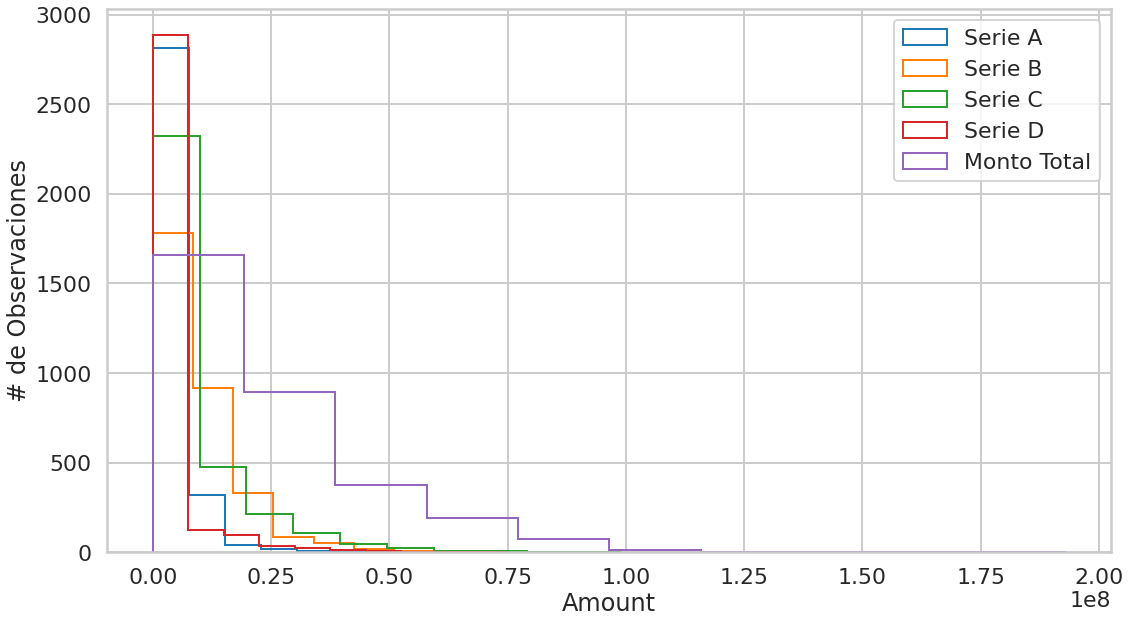

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches([18,10])
ax.hist( data_fondos['Series_A_Amount'],label="Serie A", bins=10, histtype="step")
ax.hist(data_fondos['Series_B_Amount'], label="Serie B",bins =10, histtype="step")
ax.hist(data_fondos['Series_C_Amount'], label="Serie C",bins =10, histtype="step")
ax.hist(data_fondos['Series_D_Amount'], label="Serie D",bins =10, histtype="step")
ax.hist(data_fondos['Total_Amount'], label= "Monto Total", bins =10, histtype='step')
ax.set_xlabel("Amount")
ax.set_ylabel("# de Observaciones")

ax.legend()
plt.show()

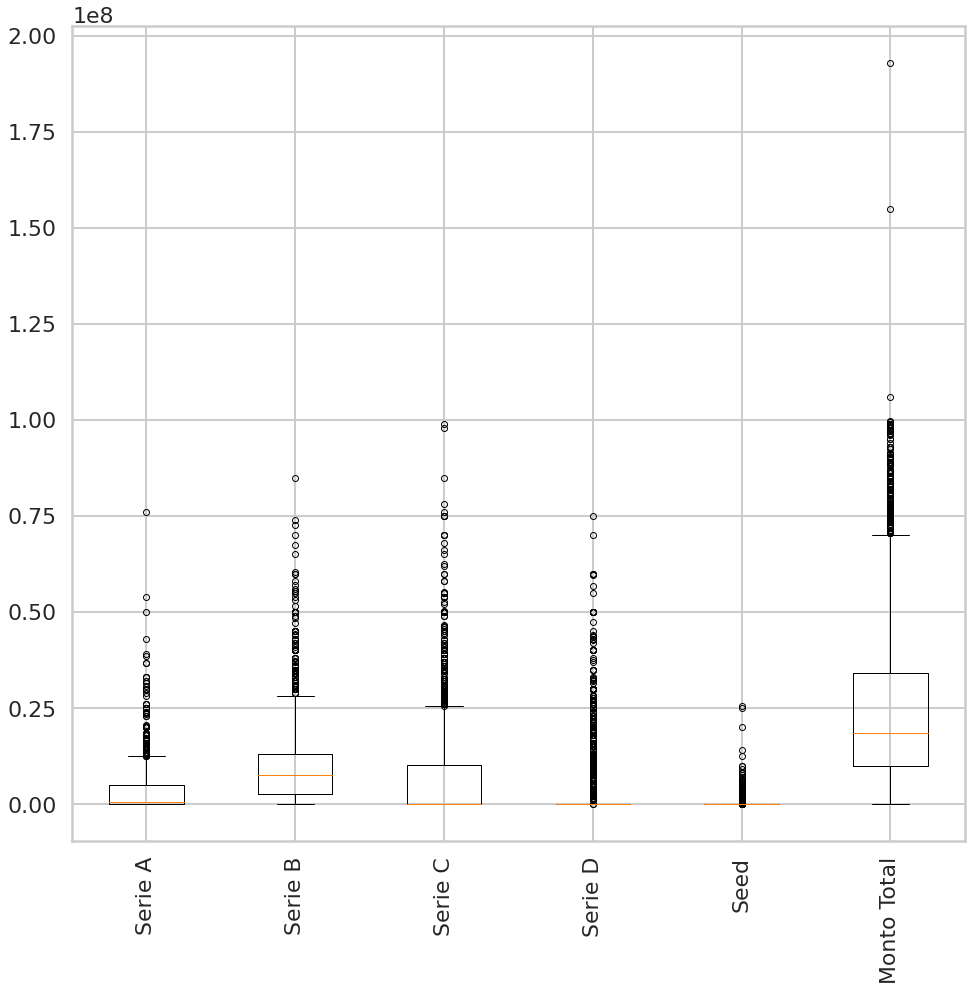

In [ ]:

fig, ax = plt.subplots()
fig.set_size_inches([16,15])
ax.boxplot([data_fondos['Series_A_Amount'],data_fondos['Series_B_Amount'], data_fondos['Series_C_Amount'],data_fondos['Series_D_Amount'],data_fondos['Seed_Amount'],data_fondos['Total_Amount']])
ax.set_xticklabels(["Serie A","Serie B","Serie C", "Serie D", "Seed", "Monto Total"], rotation=90)
ax.set_ylabel = "Monto Us Dollars"
plt.show()

In [ ]:
rubros = data_fondos['Market'].unique()
#print(rubros)

<ipython-input-20-4e7633190211>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(rubros, fontsize=7, rotation =90)


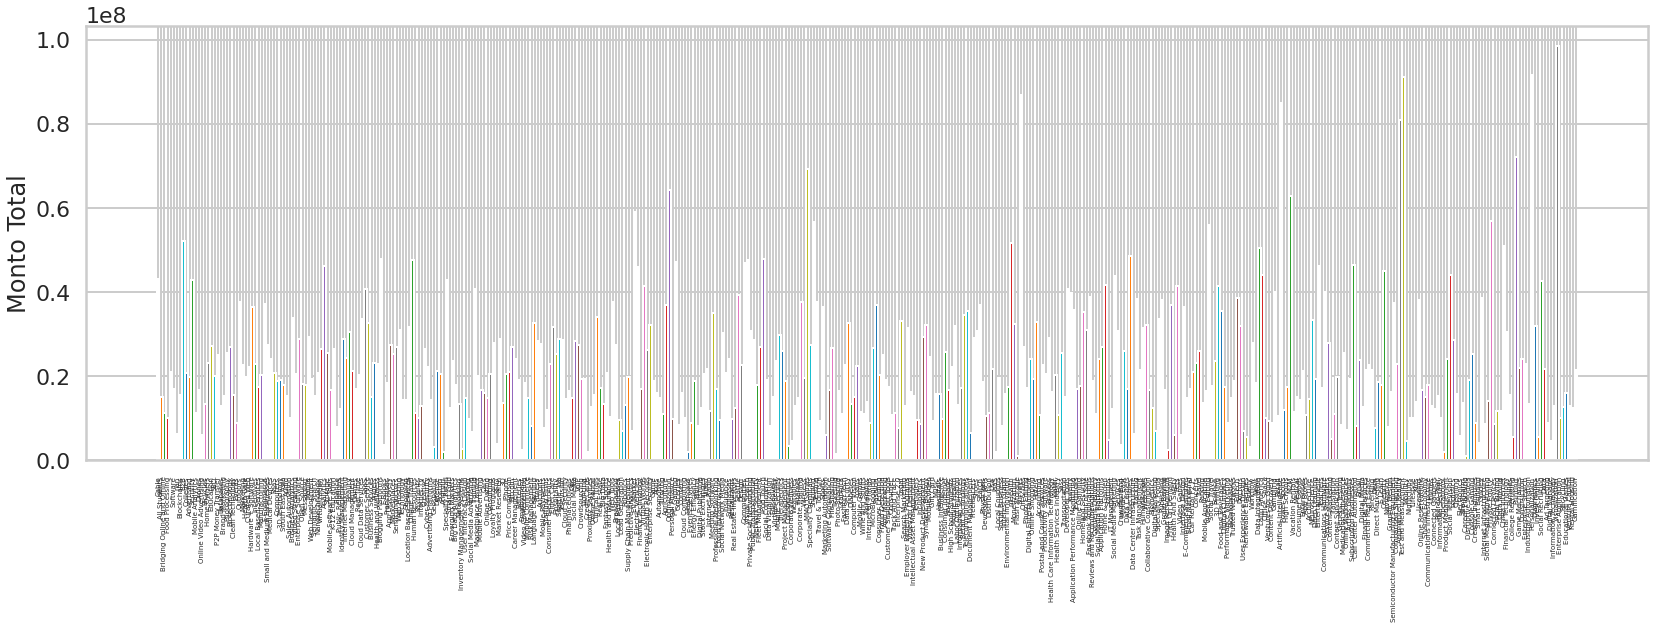

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches([28,8])

for rubro in rubros:
  rubro_df = data_fondos[data_fondos["Market"]== rubro]
  ax.bar(rubro, rubro_df["Total_Amount"].mean())

ax.set_ylabel("Monto Total")  
ax.set_xticklabels(rubros, fontsize=7, rotation =90)

plt.show()


In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/Datasets/english_tweets.csv')

In [ ]:
data1.head()

,Unnamed: 0,Company,Href,Likes,Name,Retweets,Series,Text,Time
0,1,Occipital,/occipital,0 likes,Occipital,1 retweet,_Series_A,"Cats out of the bag, we're excited! RT @savvys...",14 Jul 2011
1,3,Occipital,/ortidog,0 likes,Paul White,0 retweets,_Series_A,"No matter what happens, I always have the Occi...",14 Jul 2011
2,4,Occipital,/durlancastro,0 likes,Durlan Castro,0 retweets,_Series_A,Headaches are mostly caused by adhesions in th...,14 Jul 2011
3,6,Occipital,/tash_jade,0 likes,a.h. sataN,0 retweets,_Series_A,My occipital spatula is orbiting right now. No...,14 Jul 2011
4,12,Occipital,/DarinRMcClure,0 likes,Darin,0 retweets,_Series_A,I wish I could embed my 360's @occipital #SMMOC,13 Jul 2011


#DESCRIPCION INICIAL DEL DATASET


|Columna | Descripcion|
|---------|------------|
|Company |Nombre de la compañía|
|Href |Usuario que realizó el comentario|
|Likes |Cantidada de likes que recibió el comentario|
|Nombre |Nombre de la persona que publica el tweet|
|Reteewts |Cantidad de retweets del comentario|
|Series |Tipo de serie|
|Text |Comentario|
|Time |Fecha de publicación del tweet|


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177941 entries, 0 to 177940
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  177941 non-null  int64 
 1   Company     177941 non-null  object
 2   Href        177941 non-null  object
 3   Likes       177941 non-null  object
 4   Name        177915 non-null  object
 5   Retweets    177941 non-null  object
 6   Series      177941 non-null  object
 7   Text        177941 non-null  object
 8   Time        177896 non-null  object
dtypes: int64(1), object(8)
memory usage: 12.2+ MB


Contamos cuantos tweets estan relacionados a las SERIES de financiamiento.

In [ ]:
from collections import Counter
Counter(data1.Series)

Counter({'_Series_A': 46521,
         '_Series_B': 78292,
         '_Series_C': 38815,
         '_Series_D': 14313})

In [ ]:
#Contamos numero de likes y retweets conviertiendo los string a int
def get_num_first(text):
    try:
        return int(text.split()[0])
    except:
        return 0


In [ ]:
likes = data1.apply(lambda row: get_num_first(row[2]), axis=1)
retweets = data1.apply(lambda row: get_num_first(row[4]), axis=1)

In [ ]:
#Para cambiar las fechas a formato date
from datetime import datetime
def get_date(text):
    try:
        return datetime.date(datetime.strptime(text, '%d %b %Y'))
    except:
        return 0


In [ ]:
dates = data1.apply(lambda row: get_date(row[7]), axis=1)

In [ ]:
#Creamos un nuevo dataframe con los likes, retweets y fechas procesados
tweets_df = pd.DataFrame({    
                  'company_name': data1['Company'], 
                  'tweeter_href': data1['Href'],
                  'likes'       : likes,
                  'tweeter_name': data1['Name'],
                  'retweets'    : retweets,
                  'Series'      : data1['Series'],
                  'text'        : data1['Text'],
                  'date'        : dates
             })



In [ ]:
tweets_df.head()

,company_name,tweeter_href,likes,tweeter_name,retweets,Series,text,date
0,Occipital,/occipital,0,Occipital,0,_Series_A,"Cats out of the bag, we're excited! RT @savvys...",0
1,Occipital,/ortidog,0,Paul White,0,_Series_A,"No matter what happens, I always have the Occi...",0
2,Occipital,/durlancastro,0,Durlan Castro,0,_Series_A,Headaches are mostly caused by adhesions in th...,0
3,Occipital,/tash_jade,0,a.h. sataN,0,_Series_A,My occipital spatula is orbiting right now. No...,0
4,Occipital,/DarinRMcClure,0,Darin,0,_Series_A,I wish I could embed my 360's @occipital #SMMOC,0


In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177941 entries, 0 to 177940
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   company_name  177941 non-null  object
 1   tweeter_href  177941 non-null  object
 2   likes         177941 non-null  int64 
 3   tweeter_name  177915 non-null  object
 4   retweets      177941 non-null  int64 
 5   Series        177941 non-null  object
 6   text          177941 non-null  object
 7   date          177941 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 10.9+ MB


In [ ]:
#Contamos el numero de startups
len(tweets_df.company_name.unique())

1940

In [ ]:
# nos deshacemos de los valores faltantes
tweets_df = tweets_df[tweets_df['text'].notnull()]
#tweets_df = tweets_df[tweets_df['date'] != 0] # we mark 0 above for missing dates


In [ ]:
tweets_df.shape

(177941, 8)

##Hacemos un join de los dos Datasets para hacer coincidir los tweets con las empresas que los generaron##

In [ ]:
tweets2 = tweets_df.groupby(["company_name", "text"])['likes'].count()


In [ ]:
tweetsdf2 = tweets2.reset_index()

In [ ]:
tweetsdf2.head()

,company_name,text,likes
0,140Proof,"""@Detroit_O: twitter just seems to be the plac...",1
1,140Proof,#140proof mention -- targeted stream / twitter...,1
2,140Proof,#Absinthe #140proof Let's go! Flaming ice cube...,1
3,140Proof,#goldengrahams #140proof did i just get sent a...,1
4,140Proof,#smashsummit live on Ustream if anyone interes...,1


In [ ]:
data_fondos.rename(columns={"Names": "company_name"}, inplace=True)

In [ ]:
data_fondos.head()

,Description,Market,company_name,No_Stage_Amount,No_Stage_Date,Pitch,Seed_Amount,Seed_Date,Series_A_Amount,Series_A_Date,Series_B_Amount,Series_B_Date,Series_C_Amount,Series_C_Date,Series_D_Amount,Series_D_Date,Stage,Total_Amount
0,NaN,Cable,Epic-Sciences,0,NaN,NaN,0,NaN,0,NaN,13000000,"Nov 13, 2012",30000000,"Jul 30, 2014",0,NaN,Series C,43000000
1,NaN,All Students,Apreso-Classroom,0,NaN,NaN,0,NaN,0,NaN,15000000,"Oct 14, 2008",0,NaN,0,NaN,Series B,15000000
2,Visualead (视觉码) creates better interactions be...,Bridging Online and Offline,Visualead,0,NaN,Effective and Secure Offline to Mobile experie...,750000,"Mar 25, 2012",1600000,"Aug 15, 2013",0,"Jan 20, 2015",0,NaN,0,NaN,Series B,2350000
3,NaN,Food Processing,Onshift,7000000,"Feb 3, 2014",NaN,0,NaN,0,NaN,3000000,"Feb 2, 2012",0,NaN,0,NaN,Series C,10000000
4,NaN,-,Xendex-Holding,0,NaN,NaN,0,NaN,0,"Jun 25, 2008",3500000,"Nov 30, 2009",0,NaN,0,NaN,Series A,3500000


In [ ]:
len(data_fondos.company_name.unique())

3204

In [ ]:
df_final = data_fondos.merge(tweetsdf2, on="company_name", how='left')

In [ ]:
df_final.shape

(150750, 20)

In [ ]:
len(df_final.company_name.unique())

3204

In [ ]:
df_final.head()

,Description,Market,company_name,No_Stage_Amount,No_Stage_Date,Pitch,Seed_Amount,Seed_Date,Series_A_Amount,Series_A_Date,Series_B_Amount,Series_B_Date,Series_C_Amount,Series_C_Date,Series_D_Amount,Series_D_Date,Stage,Total_Amount,text,likes
0,NaN,Cable,Epic-Sciences,0,NaN,NaN,0,NaN,0,NaN,13000000,"Nov 13, 2012",30000000,"Jul 30, 2014",0,NaN,Series C,43000000,NaN,NaN
1,NaN,All Students,Apreso-Classroom,0,NaN,NaN,0,NaN,0,NaN,15000000,"Oct 14, 2008",0,NaN,0,NaN,Series B,15000000,NaN,NaN
2,Visualead (视觉码) creates better interactions be...,Bridging Online and Offline,Visualead,0,NaN,Effective and Secure Offline to Mobile experie...,750000,"Mar 25, 2012",1600000,"Aug 15, 2013",0,"Jan 20, 2015",0,NaN,0,NaN,Series B,2350000,@ChrisWarden_SE we (@visualead ) just came bac...,1.0
3,Visualead (视觉码) creates better interactions be...,Bridging Online and Offline,Visualead,0,NaN,Effective and Secure Offline to Mobile experie...,750000,"Mar 25, 2012",1600000,"Aug 15, 2013",0,"Jan 20, 2015",0,NaN,0,NaN,Series B,2350000,@SilverValley_ID great design! How long did or...,1.0
4,Visualead (视觉码) creates better interactions be...,Bridging Online and Offline,Visualead,0,NaN,Effective and Secure Offline to Mobile experie...,750000,"Mar 25, 2012",1600000,"Aug 15, 2013",0,"Jan 20, 2015",0,NaN,0,NaN,Series B,2350000,@ToddWasserman TwitPitch: Maybe someday you'l...,1.0


###Creamos el dataset de tweets con el que trabajaremos para hacer el Analisis de Sentimiento

In [ ]:
df_tweets_final= df_final[['company_name', 'text'] ]

In [ ]:
df_tweets_final.head()

,company_name,text
0,Epic-Sciences,NaN
1,Apreso-Classroom,NaN
2,Visualead,@ChrisWarden_SE we (@visualead ) just came bac...
3,Visualead,@SilverValley_ID great design! How long did or...
4,Visualead,@ToddWasserman TwitPitch: Maybe someday you'l...


In [ ]:
df_tweets_final.shape

(150750, 2)

In [ ]:
df_tweets_final.dropna()

,company_name,text
2,Visualead,@ChrisWarden_SE we (@visualead ) just came bac...
3,Visualead,@SilverValley_ID great design! How long did or...
4,Visualead,@ToddWasserman TwitPitch: Maybe someday you'l...
5,Visualead,@arifuld My favorite now is @visualead :) But ...
6,Visualead,@charleskaufman You do know your Visual QR Cod...
...,...,...
150743,Mediastay,OFFERMATCH - our new way 4 u 2 get more revenu...
150744,Mediastay,RT @webutation: mediastay.com just got 60/100 ...
150745,Mediastay,Seeking a job in a start-up ? Mediastay is hi...
150746,Mediastay,Wanted #emploi Mediastay cherche un(e) Chef de...


In [ ]:
#Removemos duplicados
df_tweets_final=df_tweets_final.drop_duplicates(subset=['text'])
df_tweets_final.shape

(148940, 2)

##Limpiamos menciones, urls, puntuacion, hashtags##

In [ ]:
def tweet_cleaner(text):
    #remove RT
    text = re.sub("RT @[\w]*:","",text)
    #remove twitter handles (@user)
    text = re.sub("(@[A-Za-z0-9_]+)","", text)
    #remove url links
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    # remove whitespaces
    text = ' '.join(text.split())
    # remove hashtags
    text= re.sub(r'(?<!\S)#(\S+)', r'\1', text)
    # remove Punctuation
    text = re.sub(r'[^\w\s]','',text)
    return text

In [ ]:
df_tweets_final['text'] = df_tweets_final['text'].astype(str)

In [ ]:
df_tweets_final['textl'] = df_tweets_final['text'].apply(lambda x:tweet_cleaner(x))

In [ ]:
df_tweets_final.head()

,company_name,text,textl
0,Epic-Sciences,nan,nan
2,Visualead,@ChrisWarden_SE we (@visualead ) just came bac...,we just came back from China where we launch...
3,Visualead,@SilverValley_ID great design! How long did or...,great design How long did or take you to creat...
4,Visualead,@ToddWasserman TwitPitch: Maybe someday you'l...,TwitPitch Maybe someday youll check out how is...
5,Visualead,@arifuld My favorite now is @visualead :) But ...,My favorite now is But I always read on my iP...


In [ ]:
df_tweets_final['textl'] = df_tweets_final['textl'].astype(str)
#df_tweets_final['textl'] = df_tweets_final['textl'].apply(unidecode)

In [ ]:
df_tweets_final.head()

,company_name,text,textl
0,Epic-Sciences,nan,nan
2,Visualead,@ChrisWarden_SE we (@visualead ) just came bac...,we just came back from China where we launch...
3,Visualead,@SilverValley_ID great design! How long did or...,great design How long did or take you to creat...
4,Visualead,@ToddWasserman TwitPitch: Maybe someday you'l...,TwitPitch Maybe someday youll check out how is...
5,Visualead,@arifuld My favorite now is @visualead :) But ...,My favorite now is But I always read on my iP...


###Usamos Vader para el Analisis de Sentimiento###

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
#importing sentimentintensityanaylzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
df_tweets_final['scores'] = df_tweets_final['textl'].apply(lambda text: sid.polarity_scores(text))

In [ ]:
df_tweets_final.head()

,company_name,text,textl,scores
0,Epic-Sciences,nan,nan,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,Visualead,@ChrisWarden_SE we (@visualead ) just came bac...,we just came back from China where we launch...,"{'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'comp..."
3,Visualead,@SilverValley_ID great design! How long did or...,great design How long did or take you to creat...,"{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp..."
4,Visualead,@ToddWasserman TwitPitch: Maybe someday you'l...,TwitPitch Maybe someday youll check out how is...,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp..."
5,Visualead,@arifuld My favorite now is @visualead :) But ...,My favorite now is But I always read on my iP...,"{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp..."


In [ ]:
def sentimentPredict(sentiment):
    if sentiment['compound'] >= 0.05:
      return 1
    elif sentiment['compound'] <= -0.05: 
      return 0
    else:
      return -1    

1 es sentimiento positivo

0 es neutro

-1 es sentimiento negativo


In [ ]:
df_tweets_final['label'] = df_tweets_final['scores'].apply(lambda x: sentimentPredict(x))

In [ ]:
df_tweets_final.head()

,company_name,text,textl,scores,label
0,Epic-Sciences,nan,nan,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",-1
2,Visualead,@ChrisWarden_SE we (@visualead ) just came bac...,we just came back from China where we launch...,"{'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'comp...",1
3,Visualead,@SilverValley_ID great design! How long did or...,great design How long did or take you to creat...,"{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp...",1
4,Visualead,@ToddWasserman TwitPitch: Maybe someday you'l...,TwitPitch Maybe someday youll check out how is...,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...",1
5,Visualead,@arifuld My favorite now is @visualead :) But ...,My favorite now is But I always read on my iP...,"{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...",1


In [ ]:
positive = df_tweets_final[df_tweets_final['label']== 1]
negative = df_tweets_final[df_tweets_final['label']== -1]
neutral  = df_tweets_final[df_tweets_final['label']== 0]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

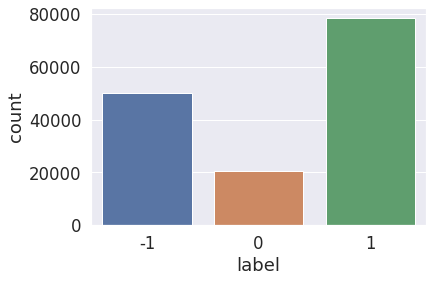

In [ ]:
sns.countplot(df_tweets_final['label'], label='count')

In [ ]:
df_tweets_final['likes']= df_final['likes']

In [ ]:
df_tweets_final['likes'].mean()

1.0213107379531217

In [ ]:
df_tweets_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148940 entries, 0 to 150747
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   company_name  148940 non-null  object 
 1   text          148940 non-null  object 
 2   textl         148940 non-null  object 
 3   scores        148940 non-null  object 
 4   label         148940 non-null  int64  
 5   likes         148939 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 12.0+ MB


###Hacemos una tabla Pivote con la suma de likes y la suma de los scores de los sentimientos###

In [ ]:
df_pivot = df_tweets_final.groupby("company_name")[['label','likes']].sum()

In [ ]:
df_pivot = df_pivot.reset_index()

In [ ]:
df_pivot.head()

,company_name,label,likes
0,1stdibs,6,31.0
1,2C2P,16,56.0
2,2tor,2,269.0
3,365Scores,1,5.0
4,36Kr,-1,4.0


In [ ]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  1488 non-null   object 
 1   label         1488 non-null   int64  
 2   likes         1488 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 35.0+ KB


### Histograma del Sentimiento ##

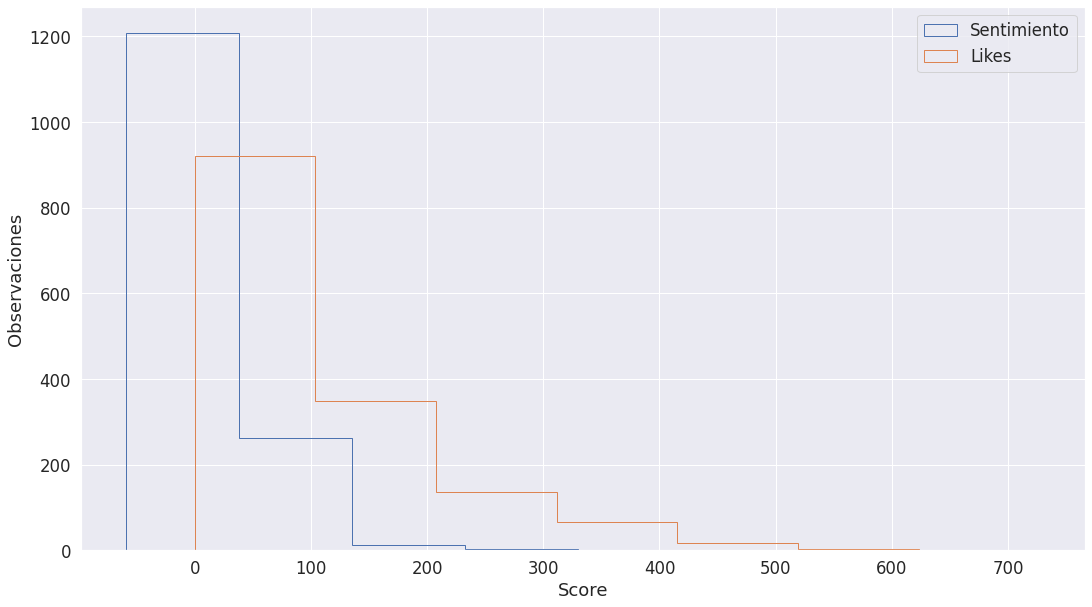

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches([18,10])
ax.hist( df_pivot['label'],label="Sentimiento", bins=7, histtype="step")
ax.hist(df_pivot['likes'], label="Likes", bins=7, histtype="step")

ax.set_xlabel("Score")
ax.set_ylabel("Observaciones")

ax.legend()
plt.show()

###Correlacion entre el score de sentimiento y el numero de likes###

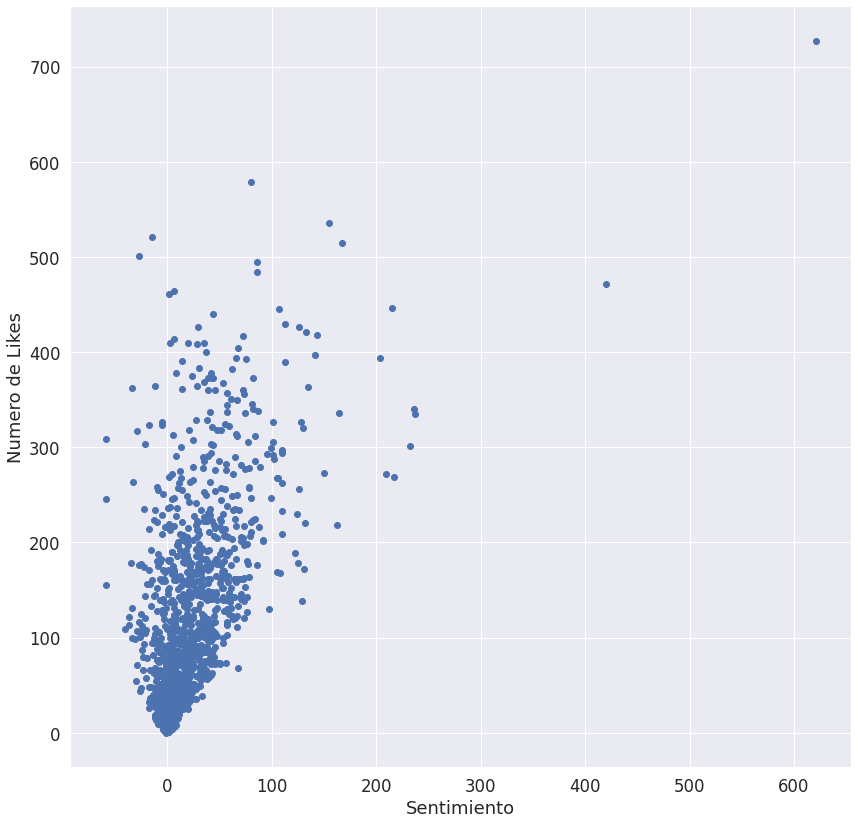

In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches([14,14])
ax.scatter(df_pivot['label'], df_pivot['likes'])

ax.set_xlabel("Sentimiento")
ax.set_ylabel("Numero de Likes")

plt.show()

###Construimos nuestro dataset Final

In [ ]:
df_F = data_fondos.merge(df_pivot, on="company_name", how='left')

###Analizamos la correlacion de el analisis de sentimiento y el monto total y los montos parciales de las series

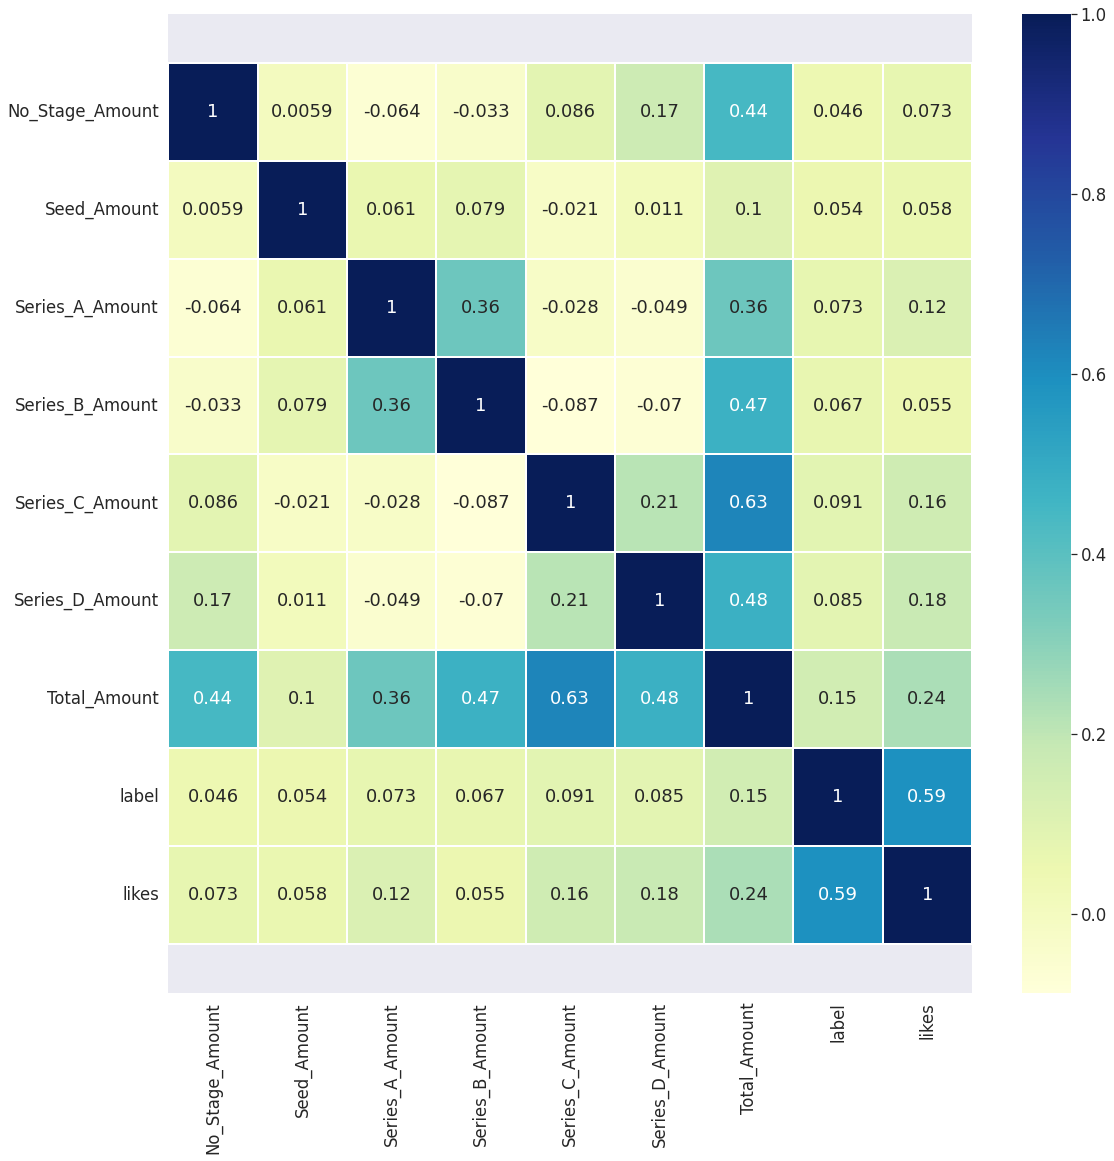

In [ ]:

fig,ax = plt.subplots()
fig.set_size_inches(18, 18) 
sns.set(font_scale=1.5)
sns.heatmap(df_F.corr(),cmap ="YlGnBu",linewidths = 0.1, annot = True)
#sns.tick_params(labelsize=5)
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.show()

###Topic Modeling###

trabajar con df_tweets_final

In [ ]:
def lemmatize_text(text):
  lemmatizer = WordNetLemmatizer()
  tokens = nltk.word_tokenize(text)
  lematized_tokens=[lemmatizer.lemmatize(token) for token in tokens]
  return lematized_tokens

In [ ]:
df_tweets_final['l_text'] = df_tweets_final['textl'].apply(lambda x: lemmatize_text(x))

In [ ]:
tweets_clean_df = df_tweets_final[['text','l_text']]

In [ ]:
tweets_clean_df.head()

,text,l_text
0,nan,[nan]
2,@ChrisWarden_SE we (@visualead ) just came bac...,"[we, just, came, back, from, China, where, we,..."
3,@SilverValley_ID great design! How long did or...,"[great, design, How, long, did, or, take, you,..."
4,@ToddWasserman TwitPitch: Maybe someday you'l...,"[TwitPitch, Maybe, someday, youll, check, out,..."
5,@arifuld My favorite now is @visualead :) But ...,"[My, favorite, now, is, But, I, always, read, ..."


In [ ]:
nlp = spacy.load("en_core_web_sm")

def pos_tag(tag):
    pos_tags = nltk.pos_tag(tag)
    text = ""
    for element in pos_tags:
      if element[1] == "NN":
        text = " " +element[0]+text
    return text

In [ ]:
#this column should contain lemmatized text with all the words removed which have tags other than NN[tag == "NN"].
tweets_clean_df["text_POS_removed"] = tweets_clean_df['l_text'].apply(lambda x:pos_tag(x) ) 

<ipython-input-143-e7d86dcb59cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_clean_df["text_POS_removed"] = tweets_clean_df['l_text'].apply(lambda x:pos_tag(x) )


In [ ]:
tweets_clean_df.head()

,text,l_text,text_POS_removed
0,nan,[nan],nan
2,@ChrisWarden_SE we (@visualead ) just came bac...,"[we, just, came, back, from, China, where, we,...",board startup
3,@SilverValley_ID great design! How long did or...,"[great, design, How, long, did, or, take, you,...",week get ire design
4,@ToddWasserman TwitPitch: Maybe someday you'l...,"[TwitPitch, Maybe, someday, youll, check, out,...",interaction customer code image
5,@arifuld My favorite now is @visualead :) But ...,"[My, favorite, now, is, But, I, always, read, ...",reader iPhone


In [ ]:
tweets_clean_df["length"] = tweets_clean_df["text_POS_removed"].apply(lambda x: len(x))

tweets_clean_df

<ipython-input-145-a636db17d296>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_clean_df["length"] = tweets_clean_df["text_POS_removed"].apply(lambda x: len(x))


,text,l_text,text_POS_removed,length
0,nan,[nan],nan,4
2,@ChrisWarden_SE we (@visualead ) just came bac...,"[we, just, came, back, from, China, where, we,...",board startup,14
3,@SilverValley_ID great design! How long did or...,"[great, design, How, long, did, or, take, you,...",week get ire design,20
4,@ToddWasserman TwitPitch: Maybe someday you'l...,"[TwitPitch, Maybe, someday, youll, check, out,...",interaction customer code image,32
5,@arifuld My favorite now is @visualead :) But ...,"[My, favorite, now, is, But, I, always, read, ...",reader iPhone,14
...,...,...,...,...
150743,OFFERMATCH - our new way 4 u 2 get more revenu...,"[OFFERMATCH, our, new, way, 4, u, 2, get, more...",wwwmediastaycom revenue get way,32
150744,RT @webutation: mediastay.com just got 60/100 ...,"[mediastaycom, just, got, 60100, point, at, we...",reputation mediastay webutationnet point medi...,54
150745,Seeking a job in a start-up ? Mediastay is hi...,"[Seeking, a, job, in, a, startup, Mediastay, i...",collaborator startup job,25
150746,Wanted #emploi Mediastay cherche un(e) Chef de...,"[Wanted, emploi, Mediastay, cherche, une, Chef...",une cherche emploi,19


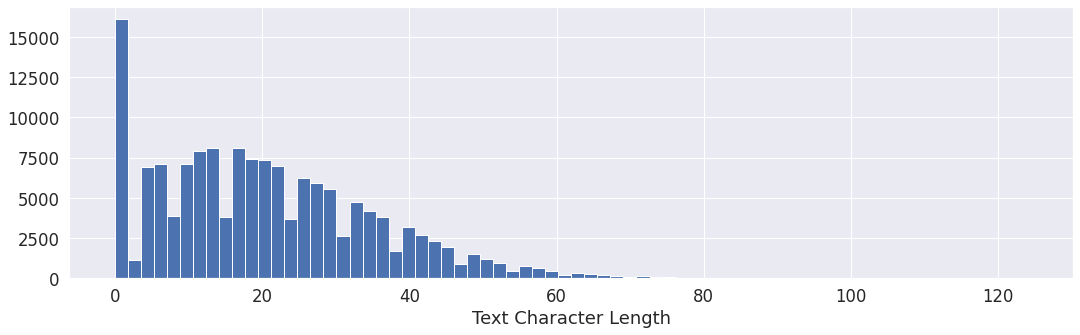

In [ ]:
plt.figure(figsize=(18,5))
plt.hist(tweets_clean_df.length, bins=70)
plt.xlabel("Text Character Length")
plt.show()

In [ ]:
from wordcloud import WordCloud
stop = set(stopwords.words('english'))

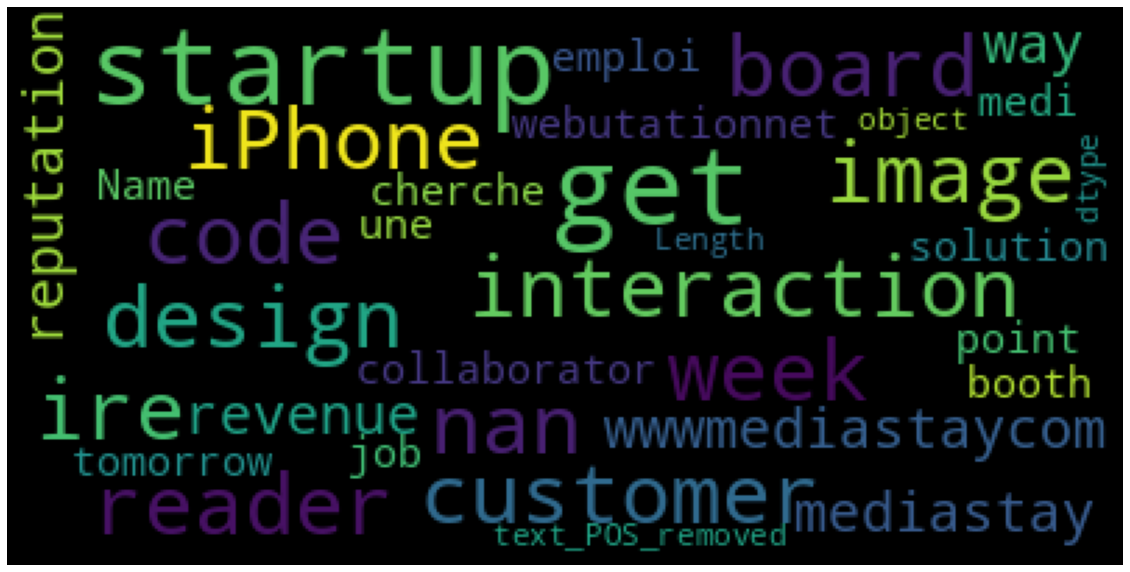

In [ ]:
wordcloud = WordCloud(stopwords=stop,max_words=45, 
                      max_font_size=40, random_state=42).generate(str(tweets_clean_df['text_POS_removed']))
fig = plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
#Removiendo -PRON- del texto
tweets_clean_df['text_clean'] = tweets_clean_df['text_POS_removed'].str.replace('-PRON-', '')

<ipython-input-149-ddb50d07ae1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_clean_df['text_clean'] = tweets_clean_df['text_POS_removed'].str.replace('-PRON-', '')


In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(tweets_clean_df['text_clean'].values.astype('U'), 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

In [ ]:
df2.head(10)

,unigram,count
0,time,4146
1,today,4118
2,day,3760
3,ha,2370
4,thing,2197
5,way,2177
6,week,2151
7,work,2095
8,company,1989
9,team,1835


In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(tweets_clean_df['text_clean'].values.astype('U'), 30)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

In [ ]:
df3.head(10)

,bigram,count
0,post blog,533
1,door glass,451
2,release press,258
3,app iphone,257
4,trip house,215
5,applause round,152
6,service customer,149
7,quality offer,106
8,day today,95
9,wa game,89


In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top 30 trigrams by frequency among all the complaints
common_words = get_top_n_trigram(tweets_clean_df['text_clean'].values.astype('U'), 30)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

In [ ]:
df4.head(10)

,trigram,count
0,trip house waffle,49
1,door glass sliding,22
2,module prestashop configure,17
3,ad order time,16
4,spot app iphone,15
5,calorie mile step,13
6,platform marketing web,12
7,genre turn satirist,12
8,fitbit calorie mile,12
9,output panel chip,12


In [ ]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words="english")

In [ ]:
dtm = tfidf.fit_transform(tweets_clean_df.text_clean)

In [ ]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5

#keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40)

In [ ]:
nmf_model.fit(dtm)

NMF(n_components=5, random_state=40)

In [ ]:
topic_results = nmf_model.transform(dtm)
topic_results[0].round(2)
topic_results[0].argmax()
topic_results.argmax(axis=1)

array([0, 4, 4, ..., 4, 0, 2])

In [ ]:
topic_results.shape

(148940, 5)

In [ ]:
tweets_clean_df['Topic'] = topic_results.argmax(axis = 1)

tweets_clean_df['Topic']

<ipython-input-162-4ca2b1d1f52c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_clean_df['Topic'] = topic_results.argmax(axis = 1)


0         0
2         4
3         4
4         4
5         4
         ..
150743    4
150744    4
150745    4
150746    0
150747    2
Name: Topic, Length: 148940, dtype: int64

In [ ]:
tweets_clean_df

,text,l_text,text_POS_removed,length,text_clean,Topic
0,nan,[nan],nan,4,nan,0
2,@ChrisWarden_SE we (@visualead ) just came bac...,"[we, just, came, back, from, China, where, we,...",board startup,14,board startup,4
3,@SilverValley_ID great design! How long did or...,"[great, design, How, long, did, or, take, you,...",week get ire design,20,week get ire design,4
4,@ToddWasserman TwitPitch: Maybe someday you'l...,"[TwitPitch, Maybe, someday, youll, check, out,...",interaction customer code image,32,interaction customer code image,4
5,@arifuld My favorite now is @visualead :) But ...,"[My, favorite, now, is, But, I, always, read, ...",reader iPhone,14,reader iPhone,4
...,...,...,...,...,...,...
150743,OFFERMATCH - our new way 4 u 2 get more revenu...,"[OFFERMATCH, our, new, way, 4, u, 2, get, more...",wwwmediastaycom revenue get way,32,wwwmediastaycom revenue get way,4
150744,RT @webutation: mediastay.com just got 60/100 ...,"[mediastaycom, just, got, 60100, point, at, we...",reputation mediastay webutationnet point medi...,54,reputation mediastay webutationnet point medi...,4
150745,Seeking a job in a start-up ? Mediastay is hi...,"[Seeking, a, job, in, a, startup, Mediastay, i...",collaborator startup job,25,collaborator startup job,4
150746,Wanted #emploi Mediastay cherche un(e) Chef de...,"[Wanted, emploi, Mediastay, cherche, une, Chef...",une cherche emploi,19,une cherche emploi,0


## Topicos Principales



1.   Post blog startup
2.   Ad app Iphone
3.   Designe release - prestahsop
4.   Platform marketing web
5.   Service Customer





In [ ]:
#stopwords
stop=stopwords.words('english')
df_tweets_final["SentimentText"]=df_tweets_final["textl"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_tweets_final["textl"].head(10)

0                                                   nan
2     we   just came back from China where we launch...
3     great design How long did or take you to creat...
4     TwitPitch Maybe someday youll check out how is...
5     My favorite now is  But I always read on my iP...
6     You do know your Visual QR Code has been scann...
7                         Thank you sir Have a good one
8     Itd be fun to do at beginning of year to teach...
9     Shoot us an email and we will be happy to expl...
10    Charlie we appreciate the mention Love the fac...
Name: textl, dtype: object

In [ ]:
freq=pd.Series(' '.join(df_tweets_final["SentimentText"]).split()).value_counts()[:20]
freq

I         27608
The        7221
like       5964
Im         5434
new        5357
get        4913
great      3803
RT         3650
today      3645
Thanks     3624
one        3605
time       3553
know       3357
good       3326
see        3212
New        3160
love       3138
A          2868
got        2852
2          2819
dtype: int64

<AxesSubplot:>

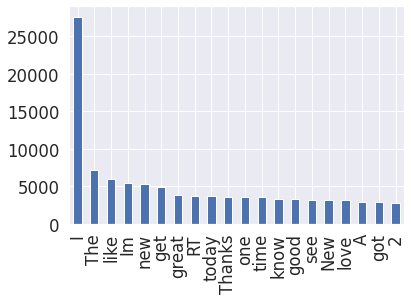

In [ ]:
import matplotlib.pyplot as plot
freq.plot(kind="bar")